In [2]:
# N-body-system-using-rebound

0.0/r0.006289474781961547/r0.012578949563923095/r0.018868424345884642/r0.02515789912784619/r0.03144737390980774/r0.037736848691769284/r0.04402632347373083/r0.05031579825569238/r0.056605273037653926/r0.06289474781961547/r0.06918422260157703/r0.07547369738353857/r0.08176317216550011/r0.08805264694746166/r0.09434212172942322/r0.10063159651138476/r0.1069210712933463/r0.11321054607530785/r0.1195000208572694/r0.12578949563923095/r0.1320789704211925/r0.13836844520315406/r0.1446579199851156/r0.15094739476707714/r0.15723686954903868/r0.16352634433100022/r0.16981581911296179/r0.17610529389492333/r0.18239476867688487/r0.18868424345884643/r0.19497371824080797/r0.20126319302276952/r0.20755266780473106/r0.2138421425866926/r0.22013161736865416/r0.2264210921506157/r0.23271056693257725/r0.2390000417145388/r0.24528951649650035/r0.2515789912784619/r0.25786846606042346/r0.264157940842385/r0.27044741562434654/r0.2767368904063081/r0.2830263651882696/r0.2893158399702312/r0.2956053147521927/r0.301894789534154

[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.         0.00095346]
[0.         0.      

Done.


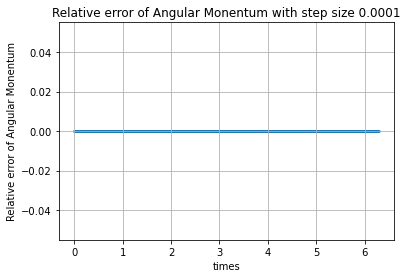

In [1]:
#WHFAST integrator to calculate the angular momentum of the planets
import rebound
import sys
import matplotlib.pyplot as plt
import numpy as np
import sympy

sim = rebound.Simulation()
sim.integrator ="WHFAST"
sim.dt = 1e-4
sim.add(m=1.0)
sim.add(m=1e-3, a=1.0, e=0.3)
sim.move_to_com()
Norbits = 1
Nsteps = Norbits*1000
times = np.linspace(0, Norbits*2*np.pi, Nsteps)
x = np.zeros((sim.N, Nsteps))
y = np.zeros_like(x)
energy = np.zeros(Nsteps)
for i, t in enumerate(times):
    print(t, end="/r")
    sim.integrate(t, exact_finish_time=0)
    energy[i] = sim.calculate_energy()
    for j in range(sim.N):
        x [j, i] = sim.particles[j].x
        y [j, i] = sim.particles[j].y

#fig, ax = plt.subplots()
#ax.scatter(x,y,s=2)
#ax.set_title("Orbit with step size %g" % sim.dt)
#ax.set_aspect("equal")
#ax.set_xlabel("x coordinate")
#ax.set_ylabel("y coordinate")
#plt.grid("True")
#fig.savefig("orbitWHFAST"+str(sim.dt)+".pdf")

#fig, ax = plt.subplots()
#ax.scatter(times, np.abs(energy-energy[0])/np.abs(energy[0]), s=2)
#print(energy)
#ax.set_title("Energy with step size %g" % sim.dt)
#ax.set_xlabel("time")
#ax.set_yscale("log")
#ax.set_ylabel("energy")
#plt.grid("True")
#fig.savefig("energyWHFAST"+str(sim.dt)+".pdf")
#print("Done.")

L = np.zeros((3, Nsteps))
Lz = np.zeros((1, Nsteps))
for i, t in  enumerate(times):
    L[:,i] = sim.calculate_angular_momentum()
    Lz[:,i] = L[:,i][2]
    print(L[:,i])

fig, ax = plt.subplots()
ax.scatter(times, np.abs(L[2]-L[2][0])/np.abs(L[2][0]), s=2)
#print(Relative error of Angular Monentum)
ax.set_title("Relative error of Angular Monentum with step size %g" % sim.dt)
ax.set_xlabel("times")
#ax.set_yscale("log")
ax.set_ylabel("Relative error of Angular Monentum")
plt.grid("True")
fig.savefig("Relative error of Angular Monentum WHFAST"+str(sim.dt)+".pdf")
print("Done.")

6.283185307179586


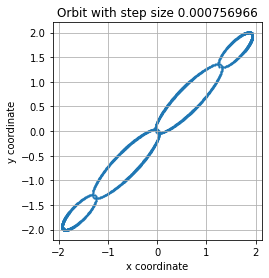

In [3]:
#Planetary Orbirts
sim = rebound.Simulation()
sim.integrator ="leapfrog"
sim.add(m= 1, x= 0.504457024898985, y= 1.058520304479640 , vx= -0.588406317185329, vy= -0.507208447977203)
sim.add(m= 1, x= 1.581323394863468, y= 1.639575414656912 , vx= 0.377133148141246, vy= 0.459577663854508)
sim.add(m= 1, x= -1.960902462113829, y= -1.605062781926992 , vx= -0.377133148141246, vy= -0.459577663854508)
sim.add(m= 1, x= -0.884036092149343, y= -1.024007671749708 , vx= 0.588406317185329, vy= 0.507208447976862)
sim.move_to_com()

sim.dt = sim.particles[1].P*1e-4
total_time = sim.particles[1].P*100
N = 1000
x = np.zeros((sim.N, N))
y = np.zeros_like(x)
times = np.linspace(0, 2*np.pi, N)
for i, t in enumerate(times):
    print(t, end="\r")
    sim.integrate(t, exact_finish_time=0)
    for j in range(sim.N):
        x[j, i] = sim.particles[j].x
        y[j, i] = sim.particles[j].y
print()
fig, ax = plt.subplots()
ax.scatter(x,y,s=1)
ax.set_title("Orbit with step size %g" % sim.dt)
ax.set_aspect("equal")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
plt.grid("True")
fig.savefig("orbit.pdf")

enter the value of N:10
enter value of gamma:3
62.8318530717958663


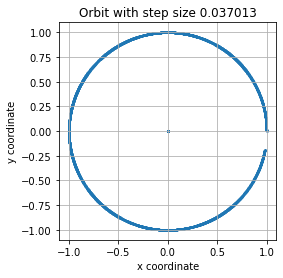

In [4]:
#Planetray orbits using the Leapfrog Method

sim = rebound.Simulation()
sim.integrator ="leapfrog"

distance = 1.0
saturnmass = 2.85716656e-04

N = int(input("enter the value of N:"))
#N = 35
r = 1
gamma = float(input("enter value of gamma:"))
#gamma = 2.3753
m = (gamma*saturnmass)/(N**3)
#m = 1.325513229e-2
G = sim.G
def fun(N):
    a = 0
    for i in range(1,N):
        b = 4*np.sin(np.pi*i/N)
        a += 1/b
    return a
i = [0,N]
In = fun(N)
v = np.sqrt(G*saturnmass/r**3 + G*m*In/r**3)
#summation = 0
#for i in range(1, n + 1):
    #summation += i # shorthand for summation = summation + i 
dphi = 2*np.pi/(N)
phi = 0

sim.add(m = 2.85716656e-04)
for i in range (0,N):
    x = distance*np.cos(phi)
    y =  distance*np.sin(phi)
    vx = -v * np.sin(phi)
    vy = v * np.cos(phi)
    sim.add (m=m, x=x, y=y, vx=vx, vy=vy)
    phi += dphi
sim.move_to_com()
sim.dt = sim.particles[i].P*1e-4
total_time = sim.particles[i].P*100
period = 2*np.pi
Noutputs = 100
Norbits = 10
Nsteps = Norbits*Noutputs
times = np.linspace(0, Norbits*period, Nsteps)
x = np.zeros((N+1, Nsteps))
y = np.zeros((N+1, Nsteps))
#number of orbits, etcpp
for i, t in enumerate(times):
    print(t, end="\r")
    sim.integrate(t, exact_finish_time=0)
    for j in range(0, N):
        x[j, i] = sim.particles[j].x
        y[j, i] = sim.particles[j].y
print()
fig, ax = plt.subplots()
ax.scatter(x,y,s=1)
ax.set_title("Orbit with step size %g" % sim.dt)
ax.set_aspect("equal")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
plt.grid("True")
fig.savefig("orbita0.pdf")

In [ ]:
# Kirkwood gaps of the saturn ring


solarmass = 1.989e30
au = 1.496e11
gravitationalconstant = 6.67408e-11
year_in_seconds = 365.25*24*3600

sim = rebound.Simulation()
N = 10003
sim.units = ("kg", "m", "s")
sim.add(m=1.989e30)
sim.add(m = 6.39e23, a = 1.5 * au, e = 0.0934)
sim.add(m = 1.898e27, a = 5.2 * au, e = 0.048)

N_testparticle = 10000
a_ini = np.linspace(2*au, 4*au, N_testparticle)
for a in a_ini:
    sim.add(a=a, f=np.random.rand()*2.*np.pi, e=0.5*np.random.rand())
orbit = 2*np.pi*np.sqrt(8*au*au*au/(gravitationalconstant*solarmass))
print("Orbit in years %g" % (orbit/year_in_seconds))
sim.dt = orbit*1e-2
sim.N_active = 3
sim.integrator = "leapfrog"
N_out = 100
xy= np.zeros((N_testparticle,2))
a_ecc = np.zeros((N_testparticle, 2))
#a = [a1, a2, a3, a4, a10 ]
#a[] = np.zeros()
#%store
#times = np.linspace(0, orbit, N_out)
simulation_time = 1e6 * year_in_seconds
times = np.linspace(0, simulation_time, N_out)
sim.move_to_com()
for i, time in enumerate(times):
    print("%.2g percent done" % (time/simulation_time*100))
    sim.integrate(time)
    for j, p in enumerate(sim.particles[3:]):
        xy[j] = [p.x, p.y]
        a_ecc[j] = [p.a, p.e]
    fig, ax = plt.subplots()
    # ax.scatter(a_ecc[:,0]/au,a_ecc[:,1], s=1)
    ax.set_xlabel("semi-major axis")
    ax.set_ylabel("number of asteroids in bin")
    ax.set_xlim(2,4)
# these lines kill the computer
#    bins = np.arange(0, 10000, 0.0005)
#    plt.hist(a_ecc[:,:,0]/au, bins =bins)
# you're giving a numpy array as argument for bins, which does
# not do what you want, see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
    sma = a_ecc[:,0]
    sma /= au
    dbin = 0.05
    bins = int((4-2)/0.005)
    ax.hist(sma, bins=bins, range=(2,4))
    ax.set_title('dbin = 0.005 au')
    fig.savefig("kirk" + str(i) + ".pdf")
    plt.close(fig)
    #plt.show()


sim.save("kirkwood_gaps.rebound")

Orbit in years 2.82817
0 percent done
1 percent done
